## Question 1.

### a) Suppose w(a) is a degree p polynomial. Write the general expression for $w(a_{i}) = b_{i}$
#### $w(a_{i}) = a^{0}_{i} +  a^{1}_{i} +  a^{2}_{i} +  a^{3}_{i} + ....  a^{p}_{i} = b_{i} \\ \text{for } i = 1,2, ..., m$


### b) Express the i = 1,...,m equations as a system in matrix form Ax = d while defining A and d. What is the form/structure of A in terms of the given $ a_{i} $?
#### A is an m x p matrix
#### x is a p x 1 column
#### d is an m x 1 column

$A=\left[\begin{array}{c}a_{1}^{0}+a_1^{1}+a_1^2+a_1^3+\cdots a_1^p \\ a_{2}^{0}+a_2^{1}+a_2^2+a_2^2+\cdots a_2^p \\ \vdots \\ a_{i}^{0}+a_i^{1}+a_i^2+a_i^3+\cdots  a_i^p\end{array}\right]$


$d=\left[\begin{array}{c}b_{1} \\ b_{2}\\ \vdots \\ b_{i}\end{array}\right]$



### c) Write a script to find the least-squares model fit to the m = 30 data points in polydata.mat. Plot the points and the polynomial fits for p = 1, 2, 3

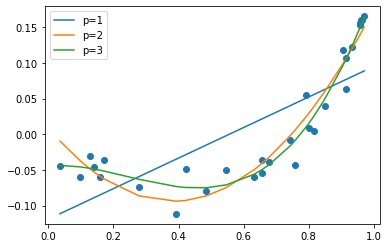

In [73]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('polydata.mat')
x_data = in_data['a']
y_data = in_data['b']



class1_A = np.hstack(    (   (x_data), np.ones(  (np.size(  (x_data)  ),1)  )      )   )
class2_A = np.hstack(((x_data**2), (x_data), np.ones((np.size((x_data)),1))))
class3_A = np.hstack(((x_data**3),(x_data**2), (x_data), np.ones((np.size((x_data)),1))))

classn_d = in_data['b']

w_1 = np.linalg.inv(class1_A.transpose()@class1_A)@class1_A.transpose()@classn_d

w_2 = np.linalg.inv(class2_A.transpose()@class2_A)@class2_A.transpose()@classn_d

w_3 = np.linalg.inv(class3_A.transpose()@class3_A)@class3_A.transpose()@classn_d

b1 = class1_A@w_1
b2 = class2_A@w_2
b3 = class3_A@w_3




unsorted = np.hstack((x_data,y_data,b1,b2,b3))


sorted_values = unsorted[unsorted[:, 0].argsort()]



plt.scatter(sorted_values[:,0], sorted_values[:,1])
plt.plot(sorted_values[:,0],sorted_values[:,2], label = "p=1")
plt.plot(sorted_values[:,0],sorted_values[:,3], label = "p=2")
plt.plot(sorted_values[:,0],sorted_values[:,4], label = "p=3")


plt.legend()

## Question 2.

### a) Derive the solution to least-squares problem minw $||x - T w||^{2}_{2}$ when $\text{T is an n- by-r matrix}$ of orthonormal columns


$\begin{aligned} &T^{T}w = x \\& T^T(T w-x)=0 \\ & T^{T} T w=T^{T} x \\ & \left(T^{T} T\right)^{-1}\left(T^{T} T\right)w=\left(T^{T} T\right)^{-1} T^{T} x \\ & w=\left(T^{T} T\right)^{-1} T^{T} x\\ & w=T^{T} x \\ & \end{aligned}$



### b) Let $\boldsymbol{X}=\left[\begin{array}{llll}\boldsymbol{x}_1 & \boldsymbol{x}_2 & \cdots & \boldsymbol{x}_p\end{array}\right]$ be an $n$-by- $p$ matrix. Use the least-squares problems $\min _{\boldsymbol{w}_i}\left\|\boldsymbol{x}_i-\boldsymbol{T} \boldsymbol{w}_i\right\|_2^2$ to find $\boldsymbol{W}=\left[\begin{array}{llll}\boldsymbol{w}_1 & \boldsymbol{w}_2 & \cdots & \boldsymbol{w}_p\end{array}\right]$ in the approximation $\boldsymbol{X} \approx \boldsymbol{T} \boldsymbol{W}$. Your solution should express $\boldsymbol{W}$ as a function of $\boldsymbol{T}$ and $\boldsymbol{X}$

#### $w_{i} = T^{T}_{i}x_{i}$

## Question 3

In [74]:
import numpy as np


def gram_schmidt(B):
    """Orthogonalize a set of vectors stored as the columns of matrix B."""
    # Get the number of vectors.
    m, n = B.shape
    # Create new matrix to hold the orthonormal basis
    U = np.zeros([m,n]) 
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        v = B[:,j].copy()
        for k in range(j):
            v -= np.dot(U[:, k], B[:, j]) * U[:, k]
        if np.linalg.norm(v)>1e-10:
            U[:, j] = v / np.linalg.norm(v)
    return U


### a) Is the first basis vector you obtain equal to $t_{1}$?

In [75]:
def main():
    movie_data = loadmat('movie.mat')
    movie_dataX = movie_data['X']
    new_movie_dataX = np.hstack((np.ones( (5,1) ),(movie_dataX) ))

    # print(new_movie_dataX) # uncomment to see movie data

    t_1 = gram_schmidt(new_movie_dataX)[:, 0] # first col of the orthonormalized matrix
    print(t_1)

if __name__ == '__main__':
    main()
    

[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]


#### yes! the first basis is equal to $t_{1}$

###  b) Rank  1 approx
$  \text{find W so that } X ≈ t_{1}W \\ \text{compute } t_{1}W \\ \text{compute the residual error} X - t_{1}W$ 



In [72]:
t_1 = gram_schmidt(new_movie_dataX)[:,0]
print (f"t_1 ={t_1.round(3)}")
                   
w =t_1.transpose()@movie_dataX
print (f"Approximate W = {w}")

approx_X= np.outer(t_1,w)
print (f"Approximate X = {approx_X}")

error = movie_dataX - approx_X
print (f"Residual Error = {error}")


t_1 =[0.447 0.447 0.447 0.447 0.447]
Approximate W = [13.41640786 12.96919427  8.04984472 15.20526225 17.44133022  9.8386991
  5.81377674]
Approximate X = [[6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]]
Residual Error = [[-2.   1.2 -1.6  1.2 -0.8 -0.4 -0.6]
 [ 3.  -2.8  1.4 -0.8  2.2  0.6  2.4]
 [-2.   2.2 -0.6  0.2 -1.8 -0.4 -1.6]
 [ 3.  -3.8  2.4 -1.8  1.2  0.6  1.4]
 [-2.   3.2 -1.6  1.2 -0.8 -0.4 -1.6]]


### c) Rank 2 approx



In [71]:
t_2 = np.vstack(((gram_schmidt(new_movie_dataX)[:,0]),(gram_schmidt(new_movie_dataX)[:,1]))).transpose()
print (f"t_2 ={t_2.round(3)}")
# print(movie_dataX.shape)
                   
w =t_2.transpose()@movie_dataX
print (f"Approximate W = {w.round(3)}")

approx_X= t_2@w
print (f"Approximate X = {approx_X.round(3)}")

error = movie_dataX - approx_X
print (f"Residual Error = {error.round(3)}")


t_2 =[[ 0.447 -0.365]
 [ 0.447  0.548]
 [ 0.447 -0.365]
 [ 0.447  0.548]
 [ 0.447 -0.365]]
Approximate W = [[13.416 12.969  8.05  15.205 17.441  9.839  5.814]
 [ 5.477 -6.025  3.469 -2.373  3.104  1.095  3.469]]
Approximate X = [[4.    8.    2.333 7.667 6.667 4.    1.333]
 [9.    2.5   5.5   5.5   9.5   5.    4.5  ]
 [4.    8.    2.333 7.667 6.667 4.    1.333]
 [9.    2.5   5.5   5.5   9.5   5.    4.5  ]
 [4.    8.    2.333 7.667 6.667 4.    1.333]]
Residual Error = [[ 0.    -1.    -0.333  0.333  0.333  0.     0.667]
 [ 0.     0.5   -0.5    0.5    0.5    0.     0.5  ]
 [ 0.     0.     0.667 -0.667 -0.667  0.    -0.333]
 [ 0.    -0.5    0.5   -0.5   -0.5    0.    -0.5  ]
 [ 0.     1.    -0.333  0.333  0.333  0.    -0.333]]


### d) Rank 3 approx

In [70]:
t_3 = np.vstack(((gram_schmidt(new_movie_dataX)[:,0]),(gram_schmidt(new_movie_dataX)[:,1]),(gram_schmidt(new_movie_dataX)[:,2]))).transpose()
print (f"t_2 ={t_3.round(3)}")
# print(movie_dataX.shape)
                   
w =t_3.transpose()@movie_dataX
print (f"Approximate W = {w.round(3)}")

approx_X= t_3@w
print (f"Approximate X = {approx_X.round(3)}")

error = movie_dataX - approx_X
print (f"Residual Error = {error.round(3)}")

t_2 =[[ 0.447 -0.365 -0.632]
 [ 0.447  0.548  0.316]
 [ 0.447 -0.365  0.   ]
 [ 0.447  0.548 -0.316]
 [ 0.447 -0.365  0.632]]
Approximate W = [[13.416 12.969  8.05  15.205 17.441  9.839  5.814]
 [ 5.477 -6.025  3.469 -2.373  3.104  1.095  3.469]
 [ 0.     1.581 -0.316  0.316  0.316  0.    -0.316]]
Approximate X = [[4.    7.    2.533 7.467 6.467 4.    1.533]
 [9.    3.    5.4   5.6   9.6   5.    4.4  ]
 [4.    8.    2.333 7.667 6.667 4.    1.333]
 [9.    2.    5.6   5.4   9.4   5.    4.6  ]
 [4.    9.    2.133 7.867 6.867 4.    1.133]]
Residual Error = [[ 0.     0.    -0.533  0.533  0.533  0.     0.467]
 [ 0.    -0.    -0.4    0.4    0.4    0.     0.6  ]
 [ 0.     0.     0.667 -0.667 -0.667  0.    -0.333]
 [ 0.     0.     0.4   -0.4   -0.4    0.    -0.6  ]
 [-0.    -0.    -0.133  0.133  0.133 -0.    -0.133]]


#### e) 
#### As the rank appox increases, the residual error decreases
#### If we switched cols 1 and 2, the rank 2 and 3 approxs would remain the same because we are still using the same vectors. however if we switched the first two cols and calculated the rank 1 approx, the answer would be different

## Question 4


### a)Is $\boldsymbol{Q} \succ 0$ ?
#### yes it is, (check rank form proof)


### b) Sketch the surface $y=\boldsymbol{x}^T \boldsymbol{Q} \boldsymbol{x}$ where $\boldsymbol{x}=\left[\begin{array}{c}x_1 \\ x_2\end{array}\right]$

#### $\begin{aligned} y & =\left[\begin{array}{ll}x_1 & x_2\end{array}\right]\left[\begin{array}{ll}1 & 0 \\ 0 & 2\end{array}\right]\left[\begin{array}{l}x_1 \\ x_2\end{array}\right] \\ & =\left[\begin{array}{ll}x & 2 z\end{array}\right]\left[\begin{array}{l}x \\ z\end{array}\right] \\ y & =x^2+2 z^2\end{aligned}$

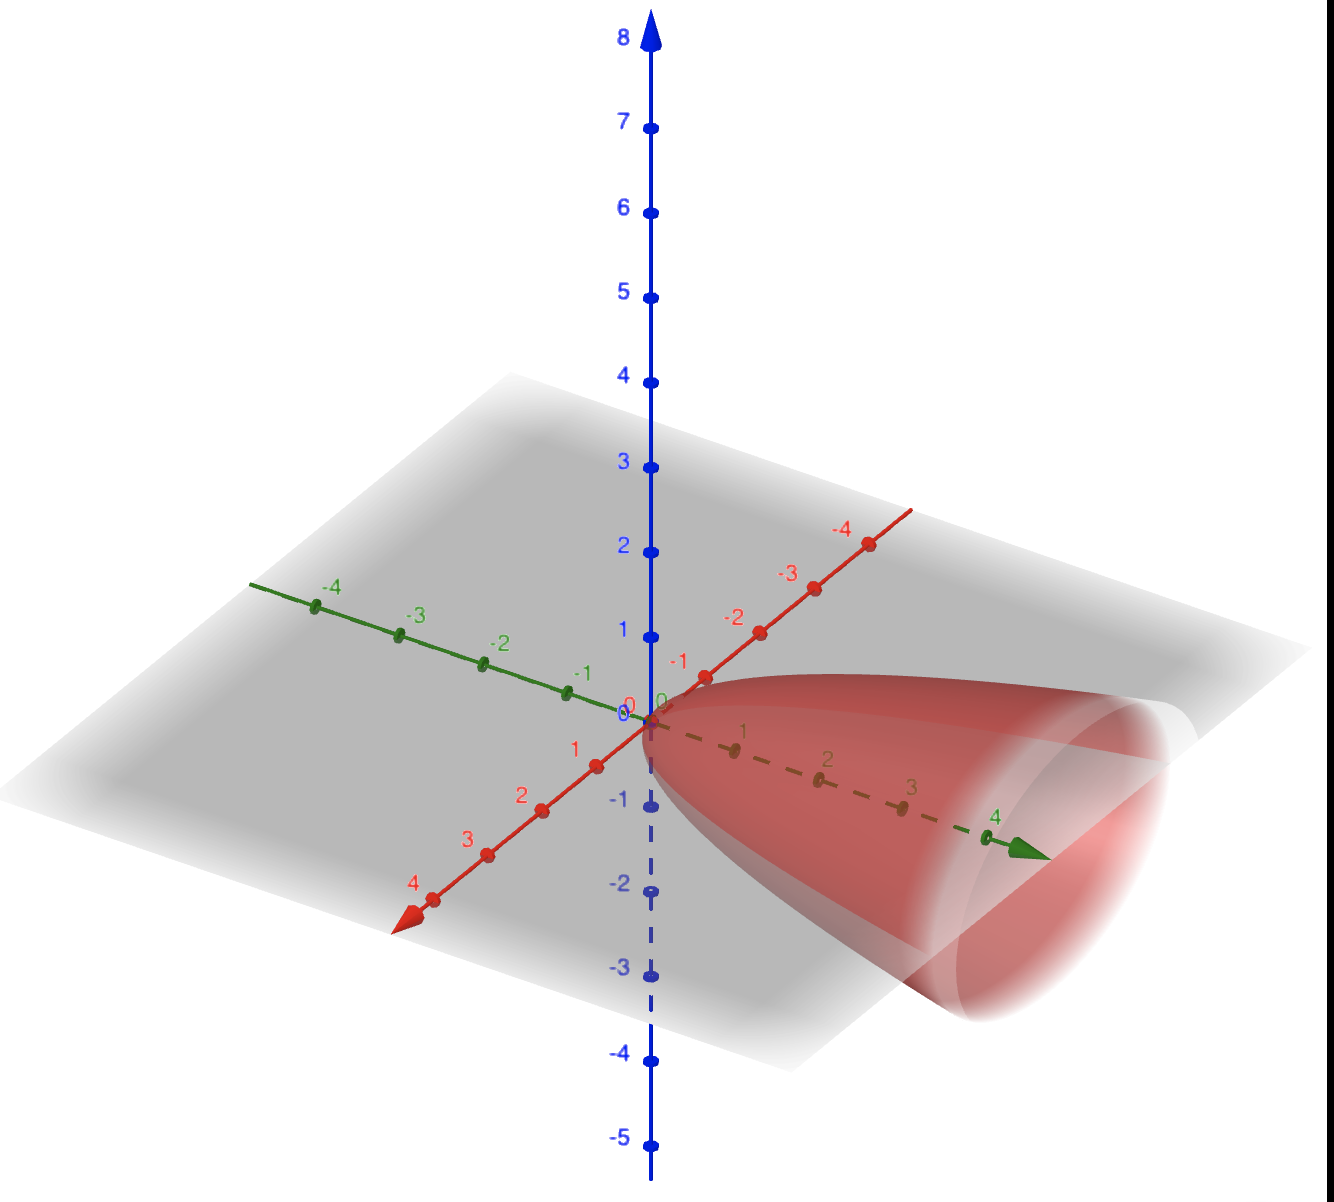

In [77]:
from IPython import display
display.Image("q4graph.png")